In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 소개
- Reid (2015) collected data on animal feses in coastal California. The data consist of DNA verified species designations as well as fields related to the time and place of the collection and the scat itself. The data frame scat_orig contains while scat contains data on the three main species.
- https://bioone.org/journals/wildlife-biology/volume-21/issue-5/wlb.00105/A-morphometric-modeling-approach-to-distinguishing-among-bobcat-coyote-and/10.2981/wlb.00105.full


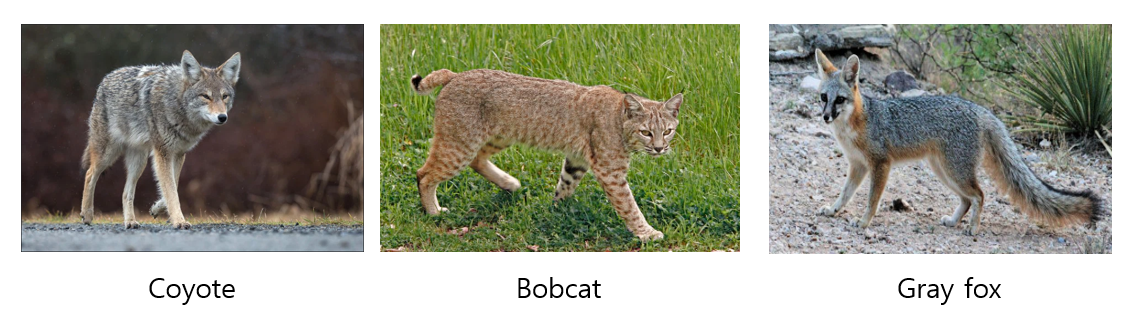



- ID : 개체 식별 번호

- Species : 개체의 분류 

#### 시간, 장소
- Year : 수집한 년도
- Month : 수집한 월
- Site : 수집된 장소
- Location : 길가 혹은 도로에서 변의 위치를 설명하는 변수
- Age : 측정된 개체의 나이

#### 형태학적 특징
- Number : 분리된 변 조각의 수
- Length : 가장 긴 조각의 길이. 소수점 첫째자리까지 표현
- Diameter : 수집된 배변의 가장 넓은 지름. 100까지 반올림 된 길이
- Taper : 변을 축으로 가장 긴 Taper의 길이
- TI : Taper의 길이를 지름(Diameter)의 길이로 나눈 비율
- Mass : 동결 건조 및 베이킹 후 총 중량 (단위 : gram)
- ropey : 변의 형태에서 ropey/twisted/woven이 나타나는가?
- segmented : 변이 분할되어 발견되었는가?
- flat : 변이 특정한 형태학적인 특징이 없이 평평한가?
- scrape : 변 주위에 scrape mark 존재 유무

#### 기타
- d13C : 델타-15N값
- d15N : 델타-13C값
- CN : d13C와 d15N의 비율

# 데이터 호출

In [2]:
scat = pd.read_csv('C:/Users/GiWoong/Desktop/연구실/Lecture/인공지능설계/scat.csv', engine='python')

In [3]:
scat.head()

,ID,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,ropey,segmented,flat,scrape
0,012612YLMC09,coyote,January,2012,YOLA,edge,5,2,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0,0
1,012612YLMC11,coyote,January,2012,YOLA,edge,3,2,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0,0
2,012612YLMC16,bobcat,January,2012,YOLA,middle,3,2,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0,1
3,012612YLMC17,coyote,January,2012,YOLA,middle,5,2,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0,0
4,012612YLMC18,failed,January,2012,YOLA,middle,3,2,13.0,26.0,37.0,1.42,29.51,-24.65,7.95,7.9,1,0,0,0


In [4]:
scat.tail()

,ID,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,ropey,segmented,flat,scrape
117,111411ANNU27,gray_fox,November,2011,ANNU,off_edge,4,1,14.0,17.0,38.9,2.29,4.24,-27.79,5.63,6.7,1,0,0,0
118,111411ANNU31,bobcat,November,2011,ANNU,middle,5,2,7.5,21.8,26.2,1.20,11.39,-27.92,6.85,6.0,1,0,0,0
119,111511YLMC01,bobcat,November,2011,YOLA,middle,1,5,14.5,17.8,9.1,0.51,15.80,-27.72,11.27,6.1,0,1,0,1
120,111511YLMC08,coyote,November,2011,YOLA,middle,4,1,12.0,20.6,36.9,1.79,36.84,-26.84,8.84,6.8,0,0,0,0
121,111511YLMC14,coyote,November,2011,ANNU,middle,3,3,11.5,22.9,49.6,2.17,4.92,-25.68,7.23,10.1,1,0,0,0


# 데이터 구조

In [5]:
scat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
ID           122 non-null object
Species      122 non-null object
Month        122 non-null object
Year         122 non-null int64
Site         122 non-null object
Location     122 non-null object
Age          122 non-null int64
Number       122 non-null int64
Length       122 non-null float64
Diameter     114 non-null float64
Taper        102 non-null float64
TI           102 non-null float64
Mass         121 non-null float64
d13C         119 non-null float64
d15N         119 non-null float64
CN           119 non-null float64
ropey        122 non-null int64
segmented    122 non-null int64
flat         122 non-null int64
scrape       122 non-null int64
dtypes: float64(8), int64(7), object(5)
memory usage: 19.2+ KB


## ID 제거

In [6]:
scat.drop('ID',axis=1,inplace=True)

# 변수 소개

## Species

In [7]:
pd.value_counts(scat.Species)

bobcat           57
coyote           28
gray_fox         25
failed            9
mixed             2
spotted_skunk     1
Name: Species, dtype: int64

### 분석에 불필요한 종 제거

In [8]:
scat = scat[scat["Species"] != 'failed']
scat = scat[scat["Species"] != 'mixed']
scat = scat[scat["Species"] != 'spotted_skunk']

In [9]:
pd.value_counts(scat.Species)

bobcat      57
coyote      28
gray_fox    25
Name: Species, dtype: int64

## Year, Month

In [10]:
pd.crosstab([scat.Year, scat.Month],scat.Species, margins=False)

Species         bobcat  coyote  gray_fox
Year Month                              
2011 November        5      10         2
     September       7       3         4
2012 April           7       2         5
     January         5       5         6
     June            7       4         2
     October         7       3         2
2013 August          5       0         4
     February        5       1         0
     May             9       0         0

## Site
scat dataset은 캘리포니아의 중부 해안 지역에 있는 두 개의 서로 다른 장소(Site)에서 도로와 산책로를 따라 약 5km의 해안에서 내륙을 가로지르며 수집된 데이터이다. dataset에서 ‘Annu’는 Año Nuevo State Park의 줄임말로, 캘리포니아 산타크루즈에서 약 30km 떨어진 곳에 위치한 주립 공원으로, 공원 내부에는 다양한 서식지들이 존재한다. ‘Yola’는 Younger Lagoon Natural Reserve의 약자로 산타크루즈의 북쪽에 있는 캘리포니아의 자연 보호구역을 의미한다.

In [11]:
pd.crosstab(scat.Site, scat.Species, margins=False)

Species,bobcat,coyote,gray_fox
Site,,,
ANNU,48,19,25
YOLA,9,9,0


## Location
길가 혹은 도로에서 변이 발견된 위치

변수 : 중앙(middle), 가장자리(edge), 가장자리를 벗어남(off edge)

In [12]:
pd.crosstab(scat.Location, scat.Species, margins=False)

Species,bobcat,coyote,gray_fox
Location,,,
edge,21,12,5
middle,19,12,16
off_edge,17,4,4


## Age

In [13]:
pd.crosstab(scat.Age, scat.Species, margins=False)

Species,bobcat,coyote,gray_fox
Age,,,
1,8,4,6
2,2,1,2
3,22,11,6
4,8,4,5
5,17,8,6


## Taper
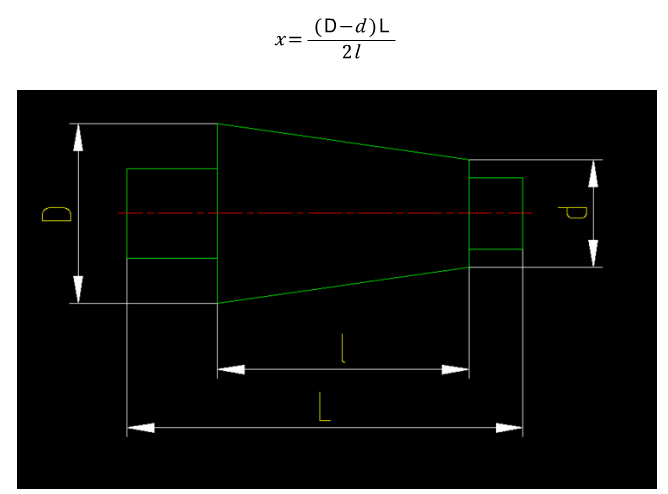

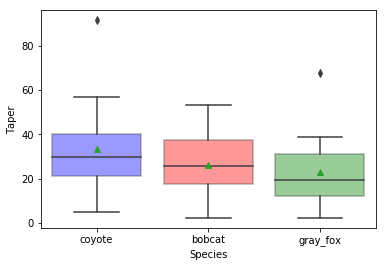

In [14]:
bplot = sns.boxplot( x=scat["Species"], y=scat["Taper"], showmeans=True,  boxprops=dict(alpha=.4)) # boxprops : 투명도 조절

# boxplot 색깔 지정
colors = ["blue", "red", "green"]

for i in range(0,3):
    mybox = bplot.artists[i]
    mybox.set_facecolor(colors[i])

## Diameter

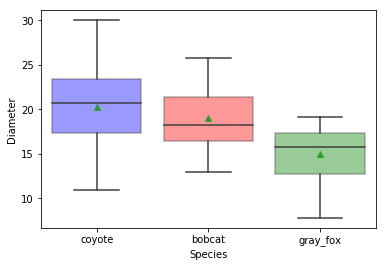

In [15]:
bplot = sns.boxplot( x=scat["Species"], y=scat["Diameter"], showmeans=True,  boxprops=dict(alpha=.4)) # boxprops : 투명도 조절

# boxplot 색깔 지정
colors = ["blue", "red", "green"]

for i in range(0,3):
    mybox = bplot.artists[i]
    mybox.set_facecolor(colors[i])

## Mass

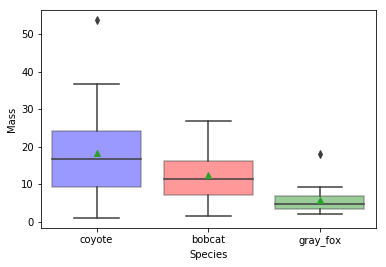

In [16]:
bplot = sns.boxplot( x=scat["Species"], y=scat["Mass"], showmeans=True,  boxprops=dict(alpha=.4)) # boxprops : 투명도 조절

# boxplot 색깔 지정
colors = ["blue", "red", "green"]

for i in range(0,3):
    mybox = bplot.artists[i]
    mybox.set_facecolor(colors[i])

## TI

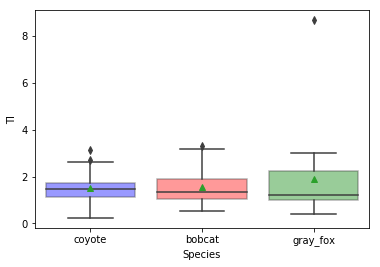

In [17]:
bplot = sns.boxplot( x=scat["Species"], y=scat["TI"], showmeans=True,  boxprops=dict(alpha=.4)) # boxprops : 투명도 조절

# boxplot 색깔 지정
colors = ["blue", "red", "green"]

for i in range(0,3):
    mybox = bplot.artists[i]
    mybox.set_facecolor(colors[i])

In [18]:
# 실제 값은 값은지 계산하여 확인

data= {"TI" : scat['TI'],
       "TI_cal" : round(scat["Taper"]/scat["Diameter"], 2)}

pd.DataFrame(data).head()

,TI,TI_cal
0,1.63,1.63
1,1.46,1.46
2,0.88,0.88
3,1.36,1.36
5,0.97,0.97


In [19]:
scat[scat["Diameter"].isna()]

,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,ropey,segmented,flat,scrape
13,gray_fox,January,2012,ANNU,middle,3,1,8.0,NaN,NaN,NaN,2.51,-25.79,7.83,20.5,0,0,1,0
15,gray_fox,January,2012,ANNU,middle,3,1,12.0,NaN,NaN,NaN,18.14,-25.18,10.10,15.5,0,0,1,0
17,gray_fox,January,2012,ANNU,middle,3,1,11.5,NaN,NaN,NaN,8.17,-25.73,9.72,18.9,0,0,1,0
18,gray_fox,January,2012,ANNU,middle,1,1,8.5,NaN,NaN,NaN,3.43,-26.17,8.07,19.9,0,0,1,0
34,gray_fox,April,2012,ANNU,middle,1,1,10.0,NaN,NaN,NaN,5.53,-26.58,8.17,18.9,0,0,1,0
106,coyote,November,2011,ANNU,off_edge,3,1,4.5,NaN,NaN,NaN,20.29,-22.69,13.32,10.4,0,0,1,0


In [20]:
scat.Diameter.isnull().sum()

6

In [21]:
scat[scat["Taper"].isna()]

,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,ropey,segmented,flat,scrape
13,gray_fox,January,2012,ANNU,middle,3,1,8.0,NaN,NaN,NaN,2.51,-25.79,7.83,20.5,0,0,1,0
15,gray_fox,January,2012,ANNU,middle,3,1,12.0,NaN,NaN,NaN,18.14,-25.18,10.10,15.5,0,0,1,0
17,gray_fox,January,2012,ANNU,middle,3,1,11.5,NaN,NaN,NaN,8.17,-25.73,9.72,18.9,0,0,1,0
18,gray_fox,January,2012,ANNU,middle,1,1,8.5,NaN,NaN,NaN,3.43,-26.17,8.07,19.9,0,0,1,0
34,gray_fox,April,2012,ANNU,middle,1,1,10.0,NaN,NaN,NaN,5.53,-26.58,8.17,18.9,0,0,1,0
57,bobcat,June,2012,ANNU,middle,3,3,10.0,24.1,NaN,NaN,26.89,-27.15,3.46,5.5,0,1,0,0
75,bobcat,September,2011,ANNU,edge,1,3,5.0,17.9,NaN,NaN,9.51,-27.50,5.87,7.0,0,1,0,0
76,coyote,September,2011,ANNU,middle,3,5,2.5,18.1,NaN,NaN,18.26,-26.43,7.91,9.3,0,1,0,0
77,bobcat,September,2011,ANNU,middle,5,1,10.0,25.8,NaN,NaN,8.73,-26.83,5.97,7.4,1,0,0,0
79,bobcat,September,2011,ANNU,middle,5,1,10.0,22.2,NaN,NaN,25.90,-26.81,6.91,7.7,0,0,0,0


In [22]:
scat.Taper.isnull().sum()

17

In [23]:
scat[scat.Diameter.isna() & scat.Taper.isna()]

,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,ropey,segmented,flat,scrape
13,gray_fox,January,2012,ANNU,middle,3,1,8.0,NaN,NaN,NaN,2.51,-25.79,7.83,20.5,0,0,1,0
15,gray_fox,January,2012,ANNU,middle,3,1,12.0,NaN,NaN,NaN,18.14,-25.18,10.10,15.5,0,0,1,0
17,gray_fox,January,2012,ANNU,middle,3,1,11.5,NaN,NaN,NaN,8.17,-25.73,9.72,18.9,0,0,1,0
18,gray_fox,January,2012,ANNU,middle,1,1,8.5,NaN,NaN,NaN,3.43,-26.17,8.07,19.9,0,0,1,0
34,gray_fox,April,2012,ANNU,middle,1,1,10.0,NaN,NaN,NaN,5.53,-26.58,8.17,18.9,0,0,1,0
106,coyote,November,2011,ANNU,off_edge,3,1,4.5,NaN,NaN,NaN,20.29,-22.69,13.32,10.4,0,0,1,0


## Ropey
동물에 따라 배변의 형태에서 엮은 것과 같은 형태를 띄는 경우가 있다. 이러한 배변의 형태적인 특징은 동물을 구분하는 중요한 특징으로 활용될 수 있다. ropey/twisted/woven 세 단어 모두 동일한 의미이다.

In [24]:
pd.crosstab(scat.ropey, scat.Species, margins=False)

Species,bobcat,coyote,gray_fox
ropey,,,
0,24,13,11
1,33,15,14


## segmented

In [25]:
pd.crosstab(scat.segmented, scat.Species, margins=False)

Species,bobcat,coyote,gray_fox
segmented,,,
0,15,14,19
1,42,14,6


## Flat
Flat은 변의 형태에서 형태학적 특징이 발견되지 않는 웅덩이 형태의 변일 경우에 1로, 형태학적으로 특징이 있을 경우 0으로 표시된다.  
형태학적 특성이 없다는 것은 동물의 변이 단단한 고체형이 아니거나 외부의 요인에 의해 배변의 형태가 손상된 경우를 의미한다.

In [26]:
pd.crosstab(scat.flat, scat.Species, margins=False)

Species,bobcat,coyote,gray_fox
flat,,,
0,57,27,20
1,0,1,5


In [27]:
pd.crosstab([scat.Diameter.isna(), scat.Taper.isna()], scat.flat, margins=False)

flat             0  1
Diameter Taper       
False    False  93  0
         True   11  0
True     True    0  6

In [28]:
scat[scat["flat"]==1]

,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,ropey,segmented,flat,scrape
13,gray_fox,January,2012,ANNU,middle,3,1,8.0,NaN,NaN,NaN,2.51,-25.79,7.83,20.5,0,0,1,0
15,gray_fox,January,2012,ANNU,middle,3,1,12.0,NaN,NaN,NaN,18.14,-25.18,10.10,15.5,0,0,1,0
17,gray_fox,January,2012,ANNU,middle,3,1,11.5,NaN,NaN,NaN,8.17,-25.73,9.72,18.9,0,0,1,0
18,gray_fox,January,2012,ANNU,middle,1,1,8.5,NaN,NaN,NaN,3.43,-26.17,8.07,19.9,0,0,1,0
34,gray_fox,April,2012,ANNU,middle,1,1,10.0,NaN,NaN,NaN,5.53,-26.58,8.17,18.9,0,0,1,0
106,coyote,November,2011,ANNU,off_edge,3,1,4.5,NaN,NaN,NaN,20.29,-22.69,13.32,10.4,0,0,1,0


## Scrape
It is reported that both bobcats and coyotes scratch the ground and leave scent marks to help maintain their territories (Bekoff 1977, Larivière and Walton 1997).   
Coyotes have scent glands between their toes and may scratch with one hind foot adjacent to feces or urine (Gese and Ruff 1997, Elbroch et al. 2012).  
Bobcats will sometimes create more controlled repeated scrapes with both hind feet and deposit urine or scat at one end (Elbroch et al. 2012).   
Scrapes are not commonly associated with gray foxes, though they, like coyotes and bobcats, will often deposit scats in groups (Fritzell and Haroldson1982). 

In [29]:
pd.crosstab(scat.scrape, scat.Species, margins=False)

Species,bobcat,coyote,gray_fox
scrape,,,
0,52,28,25
1,5,0,0


## d15N & d13C
- ‘d15n’은 δ15N(델타-15N)을 뜻하며, 이는 질소의 두 가지 안정 동위원소는 15N과 14N의 비율을 측정한 것이다.    
먹이사슬이 한 단계 올라갈 때마다 질소-15(15N)의 축적 비율이 3~4% 상승하므로 특정 생명체에서 질소-15와 질소-14의 비율을 비교함으로써  
그 생물의 식성(diet) 등을 추정할 수 있는 지표가 된다.
- ‘d13c’는 δ13C(델타-13C)을 뜻하며, 이는 탄소13의 축적비와 탄소12의 축적의 비율을 뜻한다. 델타-13C의 측정을 통하여 동물에 식성(diet)을 추정할 수 있는 지표가 된다.

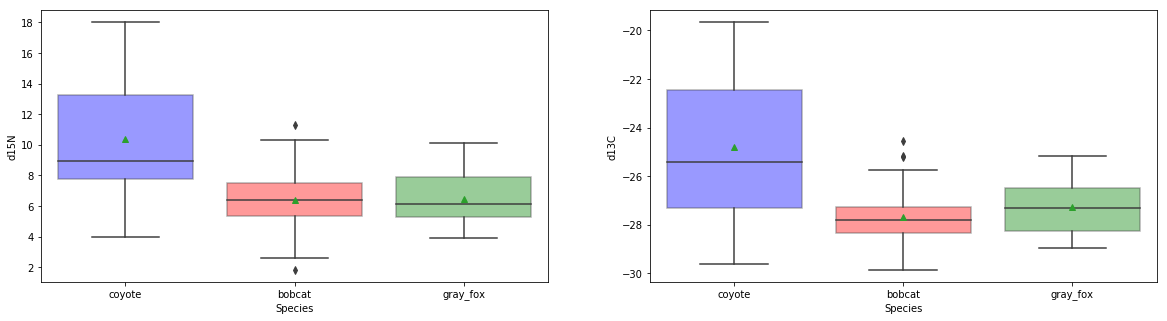

In [30]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)

bplot = sns.boxplot( x=scat["Species"], y=scat["d15N"], showmeans=True,  boxprops=dict(alpha=.4)) # boxprops : 투명도 조절

# boxplot 색깔 지정
colors = ["blue", "red", "green"]

for i in range(0,3):
    mybox = bplot.artists[i]
    mybox.set_facecolor(colors[i])
    
plt.subplot(1, 2, 2)
bplot = sns.boxplot( x=scat["Species"], y=scat["d13C"], showmeans=True,  boxprops=dict(alpha=.4)) # boxprops : 투명도 조절

# boxplot 색깔 지정
colors = ["blue", "red", "green"]

for i in range(0,3):
    mybox = bplot.artists[i]
    mybox.set_facecolor(colors[i])

<function matplotlib.pyplot.show(*args, **kw)>

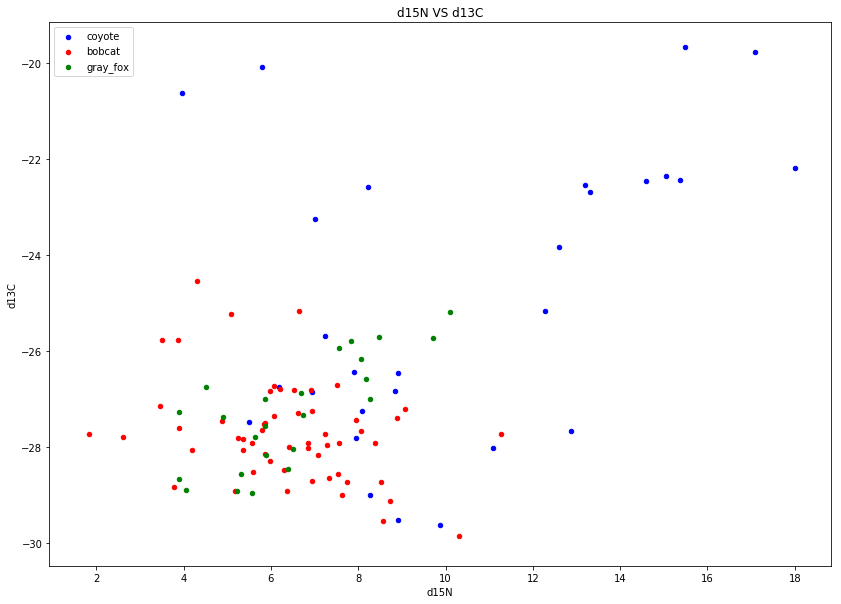

In [31]:
fig = scat[scat.Species=='coyote'].plot(kind='scatter',x='d15N',y='d13C',color='blue', label='coyote')
scat[scat.Species=='bobcat'].plot(kind='scatter',x='d15N',y='d13C',color='red', label='bobcat',ax=fig)
scat[scat.Species=='gray_fox'].plot(kind='scatter',x='d15N',y='d13C',color='green', label='gray_fox', ax=fig)
fig.set_xlabel("d15N")
fig.set_ylabel("d13C")
fig.set_title("d15N VS d13C")
fig=plt.gcf()
fig.set_size_inches(14,10)

plt.show

## CN
C:N ratios vary across ecosystems and through 'food webs', reflecting underlying organismal allocations to major molecules and chemical structures; terrestrial vascular plants tend to have high C:N ratios (Meyers 1994, Prahl et al. 1994) while animals tend to be much more nutrient rich and therefore have much lower C:N ratios (Sterner and Elser 2002).

The C:N ratio of scat, then, should serve as a proxy for an animal’s degree of carnivory; animals consuming a largely plant-based diet will produce scats with high C:N ratios and those consuming other animals will produce scats with low C:N ratios. 

Because they are obligate carnivores, bobcats should produce scats with relatively low C:N ratios. 

Coyotes and gray foxes both incorporate some amount of plant  material, mainly fruit, into their diets, therefore their scats should
generally have higher C:N ratios. 

I obtained C:N ratios of the samples as a by-product of stable carbon and nitrogen isotope analyses conducted as part of a different yet unpublished project.

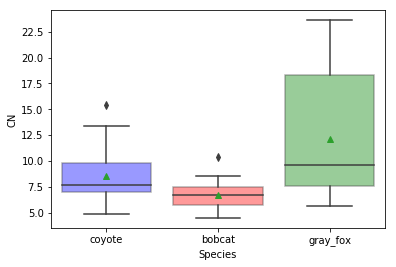

In [32]:
bplot = sns.boxplot( x=scat["Species"], y=scat["CN"], showmeans=True,  boxprops=dict(alpha=.4)) # boxprops : 투명도 조절

# boxplot 색깔 지정
colors = ["blue", "red", "green"]

for i in range(0,3):
    mybox = bplot.artists[i]
    mybox.set_facecolor(colors[i])

# 결측치 확인

In [33]:
all_na = (scat.isnull().sum() / len(scat)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]

missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data

,Missing Ratio
TI,15.454545
Taper,15.454545
Diameter,5.454545
CN,1.818182
d15N,1.818182
d13C,1.818182
Mass,0.909091


In [34]:
all_na = scat.isnull().sum()
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)

missing_data = pd.DataFrame({'# of Missing' :all_na})
missing_data

,# of Missing
TI,17
Taper,17
Diameter,6
CN,2
d15N,2
d13C,2
Mass,1


# 결측치 채우기 - Diameter

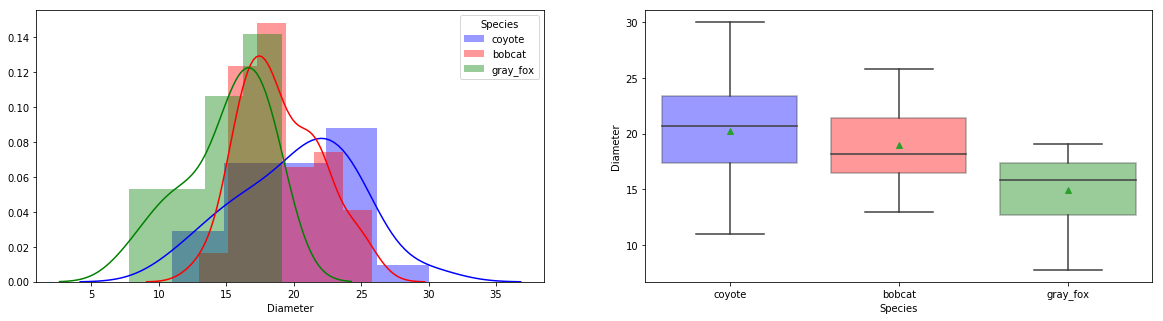

In [35]:
plt.figure(figsize=(20, 5))

#
plt.subplot(1, 2, 1)
sns.distplot(scat[scat.Species == "coyote"]["Diameter"].dropna(), 
             color="blue", label="coyote", )

sns.distplot(scat[scat.Species == "bobcat"]["Diameter"].dropna(), 
             color="red", label="bobcat")

sns.distplot(scat[scat.Species == "gray_fox"]["Diameter"].dropna(), 
             color="green", label="gray_fox")

plt.legend(title="Species")

#
plt.subplot(1, 2, 2)
bplot = sns.boxplot( x=scat["Species"], y=scat["Diameter"], showmeans=True,  boxprops=dict(alpha=.4)) # boxprops : 투명도 조절

# boxplot 색깔 지정
colors = ["blue", "red", "green"]

for i in range(0,3):
    mybox = bplot.artists[i]
    mybox.set_facecolor(colors[i])


In [36]:
scat["Diameter"].describe()

count    104.000000
mean      18.558654
std        3.882013
min        7.800000
25%       16.075000
50%       18.050000
75%       21.325000
max       30.000000
Name: Diameter, dtype: float64

In [37]:
# 종별 Taper의 중앙값으로 결측치 채우기
scat["Diameter"].fillna(scat.groupby("Species")["Diameter"].transform("median"), inplace=True)

# 결측치 채우기 - Taper

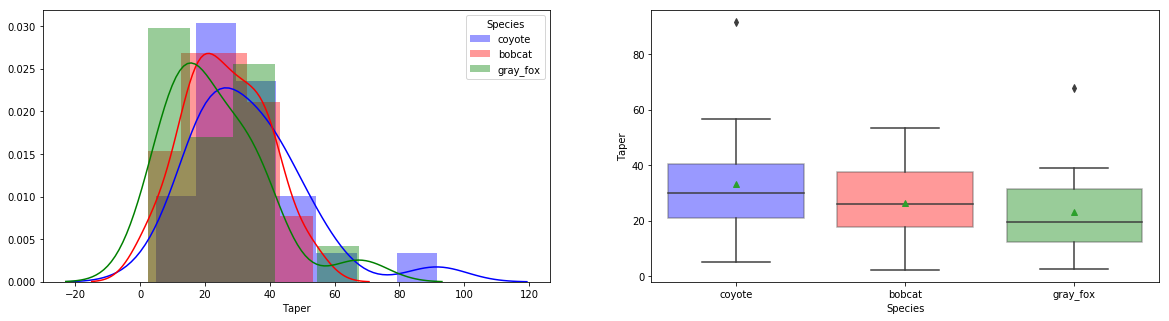

In [38]:
plt.figure(figsize=(20, 5))

#
plt.subplot(1, 2, 1)
sns.distplot(scat[scat.Species == "coyote"]["Taper"].dropna(), 
             color="blue", label="coyote", )

sns.distplot(scat[scat.Species == "bobcat"]["Taper"].dropna(), 
             color="red", label="bobcat")

sns.distplot(scat[scat.Species == "gray_fox"]["Taper"].dropna(), 
             color="green", label="gray_fox")

plt.legend(title="Species")

#
plt.subplot(1, 2, 2)
bplot = sns.boxplot( x=scat["Species"], y=scat["Taper"], showmeans=True,  boxprops=dict(alpha=.4)) # boxprops : 투명도 조절

# boxplot 색깔 지정
colors = ["blue", "red", "green"]

for i in range(0,3):
    mybox = bplot.artists[i]
    mybox.set_facecolor(colors[i])

In [39]:
scat["Taper"].fillna(scat.groupby("Species")["Taper"].transform("median"), inplace=True)

In [40]:
scat["d15N"].fillna(scat.groupby("Species")["d15N"].transform("median"), inplace=True)
scat["d13C"].fillna(scat.groupby("Species")["d13C"].transform("median"), inplace=True)
scat["Mass"].fillna(scat.groupby("Species")["Mass"].transform("median"), inplace=True)
scat["CN"].fillna(scat.groupby("Species")["CN"].transform("median"), inplace=True)

## 결측치 채우기 - TI 

In [41]:
scat[scat["TI"].isna()]

,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,ropey,segmented,flat,scrape
13,gray_fox,January,2012,ANNU,middle,3,1,8.0,15.8,19.40,NaN,2.510,-25.79,7.83,20.5,0,0,1,0
15,gray_fox,January,2012,ANNU,middle,3,1,12.0,15.8,19.40,NaN,18.140,-25.18,10.10,15.5,0,0,1,0
17,gray_fox,January,2012,ANNU,middle,3,1,11.5,15.8,19.40,NaN,8.170,-25.73,9.72,18.9,0,0,1,0
18,gray_fox,January,2012,ANNU,middle,1,1,8.5,15.8,19.40,NaN,3.430,-26.17,8.07,19.9,0,0,1,0
34,gray_fox,April,2012,ANNU,middle,1,1,10.0,15.8,19.40,NaN,5.530,-26.58,8.17,18.9,0,0,1,0
57,bobcat,June,2012,ANNU,middle,3,3,10.0,24.1,25.90,NaN,26.890,-27.15,3.46,5.5,0,1,0,0
75,bobcat,September,2011,ANNU,edge,1,3,5.0,17.9,25.90,NaN,9.510,-27.50,5.87,7.0,0,1,0,0
76,coyote,September,2011,ANNU,middle,3,5,2.5,18.1,29.95,NaN,18.260,-26.43,7.91,9.3,0,1,0,0
77,bobcat,September,2011,ANNU,middle,5,1,10.0,25.8,25.90,NaN,8.730,-26.83,5.97,7.4,1,0,0,0
79,bobcat,September,2011,ANNU,middle,5,1,10.0,22.2,25.90,NaN,25.900,-26.81,6.91,7.7,0,0,0,0


In [42]:
missing_TI = scat[scat['TI'].isna()].index.values

In [43]:
scat["TI"][missing_TI].head()

13   NaN
15   NaN
17   NaN
18   NaN
34   NaN
Name: TI, dtype: float64

In [44]:
scat["TI"].fillna( round(scat["Taper"]/scat["Diameter"], 2), inplace=True)

In [45]:
scat["TI"][missing_TI].head()

13    1.23
15    1.23
17    1.23
18    1.23
34    1.23
Name: TI, dtype: float64

## 결측치 처리 확인

In [46]:
all_na = scat.isnull().sum()
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)

missing_data = pd.DataFrame({'# of Missing' :all_na})
missing_data

,# of Missing


# Feature 제거

In [47]:
scat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 121
Data columns (total 19 columns):
Species      110 non-null object
Month        110 non-null object
Year         110 non-null int64
Site         110 non-null object
Location     110 non-null object
Age          110 non-null int64
Number       110 non-null int64
Length       110 non-null float64
Diameter     110 non-null float64
Taper        110 non-null float64
TI           110 non-null float64
Mass         110 non-null float64
d13C         110 non-null float64
d15N         110 non-null float64
CN           110 non-null float64
ropey        110 non-null int64
segmented    110 non-null int64
flat         110 non-null int64
scrape       110 non-null int64
dtypes: float64(8), int64(7), object(4)
memory usage: 22.2+ KB


### 5개 제거

In [48]:
scat.drop('Year',axis=1,inplace=True)
scat.drop('Month',axis=1,inplace=True)
scat.drop('Site',axis=1,inplace=True)
scat.drop('Location',axis=1,inplace=True)
scat.drop('Age',axis=1,inplace=True)

In [49]:
scat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 121
Data columns (total 14 columns):
Species      110 non-null object
Number       110 non-null int64
Length       110 non-null float64
Diameter     110 non-null float64
Taper        110 non-null float64
TI           110 non-null float64
Mass         110 non-null float64
d13C         110 non-null float64
d15N         110 non-null float64
CN           110 non-null float64
ropey        110 non-null int64
segmented    110 non-null int64
flat         110 non-null int64
scrape       110 non-null int64
dtypes: float64(8), int64(5), object(1)
memory usage: 17.9+ KB


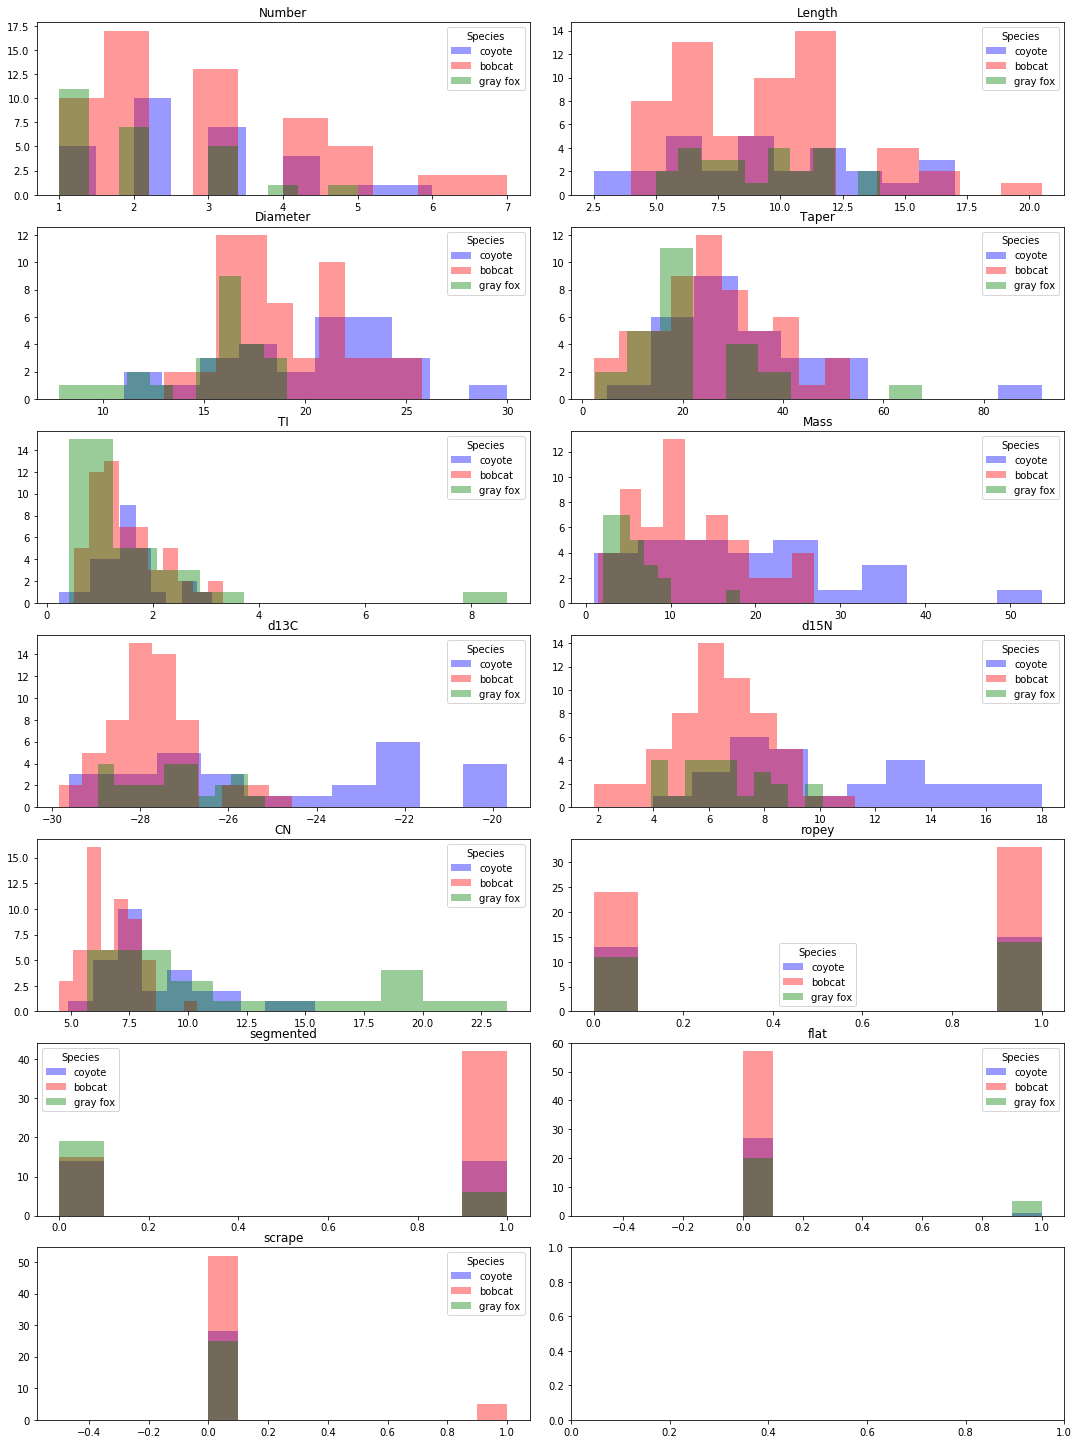

In [51]:
fig, axes = plt.subplots(7,2, figsize=(15,20))
ax = axes.ravel()
fig.tight_layout()

name=list(scat)
for i in range(1,14):
    ax[i-1].hist(scat[scat.Species == "coyote"][name[i]], 
             color="blue", label="coyote", alpha=0.4)
    ax[i-1].hist(scat[scat.Species == "bobcat"][name[i]], 
             color="red", label="bobcat", alpha=0.4)
    ax[i-1].hist(scat[scat.Species == "gray_fox"][name[i]], 
             color="green", label="gray_fox", alpha=0.4)
    ax[i-1].set_title(name[i])
    ax[i-1].legend(["coyote", "bobcat", "gray fox"], title="Species")


# 영-분산, 영-근처분산 제거

In [52]:
scat.describe()

,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,ropey,segmented,flat,scrape
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,2.618182,9.298182,18.452727,26.930000,1.553182,12.383864,-26.872727,7.415136,8.394727,0.563636,0.563636,0.054545,0.045455
std,1.427012,3.437275,3.823652,13.984185,0.934383,8.839850,2.157754,2.992853,3.634117,0.498204,0.498204,0.228130,0.209252
min,1.000000,2.500000,7.800000,2.300000,0.230000,0.940000,-29.850000,1.840000,4.500000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.500000,15.825000,18.825000,1.060000,5.562500,-28.060000,5.670000,6.225000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,9.000000,18.000000,25.900000,1.345000,9.745000,-27.470000,6.855000,7.250000,1.000000,1.000000,0.000000,0.000000
75%,3.000000,11.500000,21.150000,36.850000,1.780000,17.290000,-26.482500,8.275000,8.750000,1.000000,1.000000,0.000000,0.000000
max,7.000000,20.500000,30.000000,91.500000,8.680000,53.700000,-19.670000,18.000000,23.600000,1.000000,1.000000,1.000000,1.000000


In [53]:
scat_feature = scat[scat.columns[1:]]
scat_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 121
Data columns (total 13 columns):
Number       110 non-null int64
Length       110 non-null float64
Diameter     110 non-null float64
Taper        110 non-null float64
TI           110 non-null float64
Mass         110 non-null float64
d13C         110 non-null float64
d15N         110 non-null float64
CN           110 non-null float64
ropey        110 non-null int64
segmented    110 non-null int64
flat         110 non-null int64
scrape       110 non-null int64
dtypes: float64(8), int64(5)
memory usage: 17.0 KB


In [54]:
def VarianceThreshold_selector(data, hold):
    
    from sklearn.feature_selection import VarianceThreshold

    #Select Model
    selector = VarianceThreshold(hold)

    #Fit the Model
    selector.fit(data)
    data_transformed = data.loc[:, selector.get_support()]
    
    #
    features = selector.get_support(indices = False)
    revers_boolean = np.logical_not(features)
    feature_removed = scat_feature.iloc[:,revers_boolean]
    
    return data_transformed, feature_removed



In [55]:
x , y = VarianceThreshold_selector(scat_feature, 0.1)

In [56]:
print("선택된 변수명 : ", list(x.columns))
print("제거된 변수명 : ", list(y.columns))

선택된 변수명 :  ['Number', 'Length', 'Diameter', 'Taper', 'TI', 'Mass', 'd13C', 'd15N', 'CN', 'ropey', 'segmented']
제거된 변수명 :  ['flat', 'scrape']


In [57]:
# 변수 제거
scat.drop('flat',axis=1,inplace=True)
scat.drop('scrape',axis=1,inplace=True)

In [58]:
scat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 121
Data columns (total 12 columns):
Species      110 non-null object
Number       110 non-null int64
Length       110 non-null float64
Diameter     110 non-null float64
Taper        110 non-null float64
TI           110 non-null float64
Mass         110 non-null float64
d13C         110 non-null float64
d15N         110 non-null float64
CN           110 non-null float64
ropey        110 non-null int64
segmented    110 non-null int64
dtypes: float64(8), int64(3), object(1)
memory usage: 16.2+ KB


## 범주형 데이터에서 비율 판단

In [59]:
def get_ratio_categori(data) :
    
    # feature names
    feature_name = data.columns

    #
    highest_ratio = []
    for col in range(len(feature_name)):
        a = data[feature_name[col]].value_counts(normalize=True) * 100
        highest_ratio.append(a.iloc[0])
    
    #
    ratio = pd.DataFrame({"Columns" : data.columns,
                          "Ratio" : highest_ratio})
    
    ratio_same = ratio.sort_values(by=['Ratio'],  ascending=False)
    
    return(ratio_same)

In [60]:
ratio_same=get_ratio_categori(scat_feature)
ratio_same

,Columns,Ratio
12,scrape,95.454545
11,flat,94.545455
9,ropey,56.363636
10,segmented,56.363636
0,Number,30.909091
1,Length,10.000000
8,CN,8.181818
2,Diameter,6.363636
3,Taper,6.363636
4,TI,5.454545


# 데이터 재구조화(Melt)
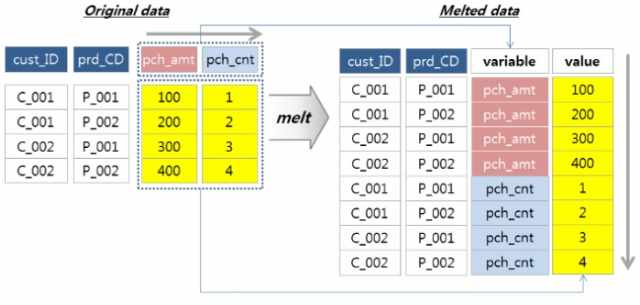

In [61]:
scat.columns

Index(['Species', 'Number', 'Length', 'Diameter', 'Taper', 'TI', 'Mass',
       'd13C', 'd15N', 'CN', 'ropey', 'segmented'],
      dtype='object')

In [62]:
species = scat.Species
features = scat.iloc[:, 1:13]

#
data = pd.concat([species, features], axis=1)
data_melt = pd.melt(data, id_vars="Species",
                    var_name = "features",
                    value_name = "value")
data_melt.head()

,Species,features,value
0,coyote,Number,2.0
1,coyote,Number,2.0
2,bobcat,Number,2.0
3,coyote,Number,2.0
4,coyote,Number,4.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

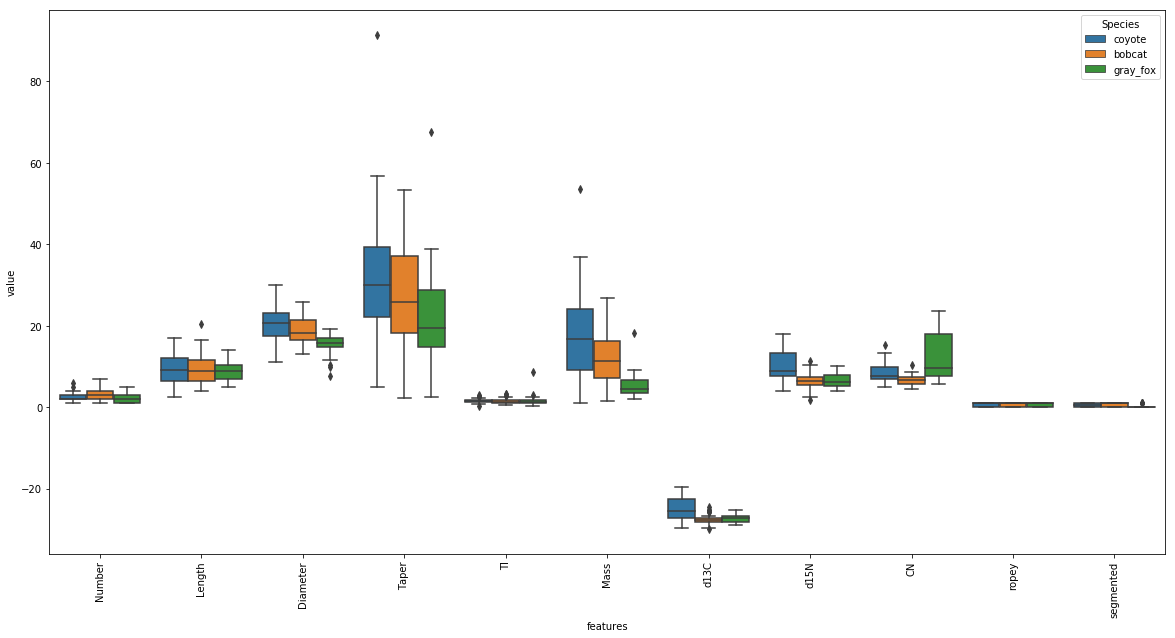

In [63]:
plt.figure(figsize=(20,10))
sns.boxplot(x="features", y="value", hue="Species", data=data_melt)
plt.xticks(rotation=90)

# Scaling

In [64]:
features.columns

Index(['Number', 'Length', 'Diameter', 'Taper', 'TI', 'Mass', 'd13C', 'd15N',
       'CN', 'ropey', 'segmented'],
      dtype='object')

In [65]:
features_scaled = features
features_scaled = ( features.iloc[:, 0:9] - features.iloc[0, 0:9].mean() ) / features.iloc[0, 0:9].std()     # standardization

data_scaled = pd.concat([species, features_scaled.iloc[:, 0:11]], axis=1)
data_scaled_melt = pd.melt(data_scaled,id_vars="Species",
                    var_name="features",
                    value_name="value")
data_scaled_melt.head()

,Species,features,value
0,coyote,Number,-0.399163
1,coyote,Number,-0.399163
2,bobcat,Number,-0.399163
3,coyote,Number,-0.399163
4,coyote,Number,-0.292261


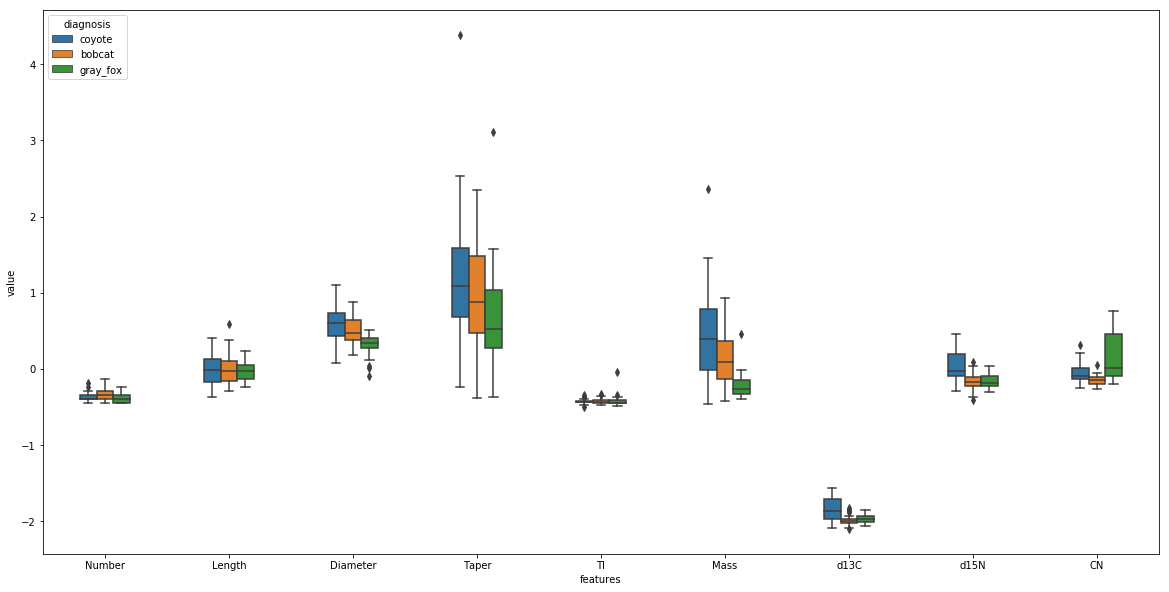

In [66]:
plt.figure(figsize=(20,10))
boxplot = sns.boxplot( y="value" , x="features", hue="Species", data=data_scaled_melt, width=0.4)   
boxplot.legend(loc='upper left', title = "diagnosis") # 레전드 위치

# 박스 플롯 간격 조절
val = 3
plt.show()

In [67]:
features_scaled["segmented"] = features.segmented
features_scaled["ropey"] = features.ropey

## 이상치 제거

In [68]:
features_scaled["Species"] = scat.Species

In [69]:
features_scaled[features_scaled.Mass > 2]

,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,segmented,ropey,Species
111,-0.292261,-0.158632,0.776768,4.38474,-0.462771,2.364276,-1.780348,0.166887,-0.131906,1,0,coyote


In [70]:
features_scaled[features_scaled.Taper > 3]

,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,segmented,ropey,Species
86,-0.399163,-0.105181,-0.089145,3.112596,-0.042108,-0.396491,-1.948720,-0.064557,-0.035694,0,1,gray_fox
111,-0.292261,-0.158632,0.776768,4.384740,-0.462771,2.364276,-1.780348,0.166887,-0.131906,1,0,coyote


In [71]:
x = features_scaled.drop(features_scaled[(features_scaled['Taper'] > 3.0) | (features_scaled['Mass'] > 2.0)].index)

In [73]:
x[x.Taper > 3]

,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,segmented,ropey,Species


In [74]:
x[x.Mass > 2]

,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,segmented,ropey,Species


In [75]:
final_feature = x.drop('Species',axis=1)
y = x.Species

# 모델링

In [76]:
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy

In [77]:
train_X, test_X, train_y, test_y = train_test_split(final_feature, y, test_size = 0.3, random_state=10) # X, y 위치 중요

In [78]:
print("Shape of X_train : ", train_X.shape)
print("Shape of y_train : ", train_y.shape)
print("Shape of X_test : ", test_X.shape)
print("Shape of y_test : ", test_y.shape)

Shape of X_train :  (75, 11)
Shape of y_train :  (75,)
Shape of X_test :  (33, 11)
Shape of y_test :  (33,)


In [79]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 69 to 12
Data columns (total 11 columns):
Number       75 non-null float64
Length       75 non-null float64
Diameter     75 non-null float64
Taper        75 non-null float64
TI           75 non-null float64
Mass         75 non-null float64
d13C         75 non-null float64
d15N         75 non-null float64
CN           75 non-null float64
segmented    75 non-null int64
ropey        75 non-null int64
dtypes: float64(9), int64(2)
memory usage: 7.0 KB


## 나이브 베이지안
https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
naive = GaussianNB()
naive.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
pred_test=naive.predict(test_X) #now we pass the testing data to the trained algorithm
pred_train=naive.predict(train_X)
print('The accuracy of train is:',metrics.accuracy_score(pred_train,train_y))
print('The accuracy of test is:',metrics.accuracy_score(pred_test,test_y))

The accuracy of train is: 0.8666666666666667
The accuracy of test is: 0.8787878787878788


# MLP

In [83]:
from sklearn.neural_network import MLPClassifier

In [84]:
mlp = MLPClassifier(solver='lbfgs') 
mlp.fit(train_X,train_y) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [85]:
pred_test=mlp.predict(test_X) #now we pass the testing data to the trained algorithm
pred_train=mlp.predict(train_X)
print('The accuracy of train is:',metrics.accuracy_score(pred_train,train_y))
print('The accuracy of test is:',metrics.accuracy_score(pred_test,test_y))

The accuracy of train is: 1.0
The accuracy of test is: 0.7575757575757576


# 로지스틱

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
logi = LogisticRegression(solver='lbfgs')
logi.fit(train_X,train_y)

C:\Users\GiWoong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
pred_test=logi.predict(test_X) #now we pass the testing data to the trained algorithm
pred_train=logi.predict(train_X)
print('The accuracy of train is:',metrics.accuracy_score(pred_train,train_y))
print('The accuracy of test is:',metrics.accuracy_score(pred_test,test_y))

The accuracy of train is: 0.7066666666666667
The accuracy of test is: 0.7272727272727273


# K-NN

In [89]:
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours

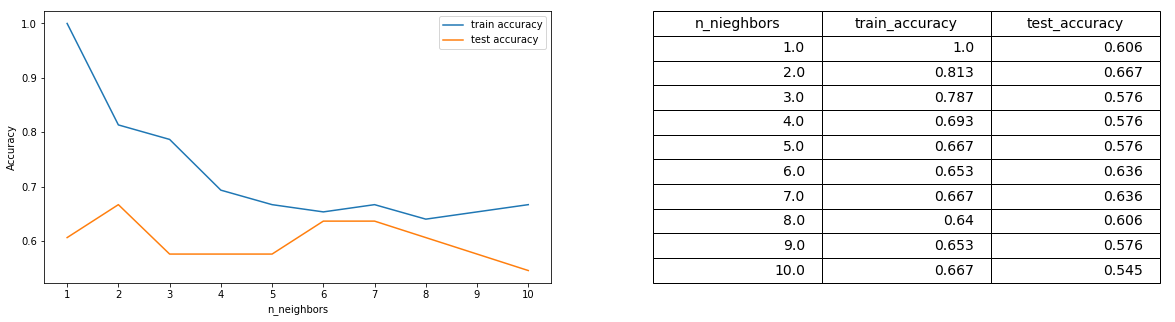

In [90]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(121)
#ax1.scatter(x=df['x'],y=df['y'])

a_index=list(range(1,11))
a=pd.Series()
b=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]



for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction_train=model.predict(train_X)
    prediction_test=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction_train,train_y)))
    b=b.append(pd.Series(metrics.accuracy_score(prediction_test,test_y)))
ax1.plot(a_index, a, label="train accuracy")
ax1.plot(a_index, b, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.xticks(x)

#
df = pd.DataFrame( {"n_nieghbors" : a_index,
                    "train_accuracy" : np.round(a,3),
                    "test_accuracy" : np.round(b,3)}
)

#
ax2 = fig.add_subplot(122)
font_size=14
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = df.values, rowLabels = None, bbox=bbox, colLabels=df.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

In [143]:
knn=KNeighborsClassifier(n_neighbors=2) #this examines 3 neighbours for putting the new data into a class
knn.fit(train_X,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [144]:
pred_test=knn.predict(test_X) #now we pass the testing data to the trained algorithm
pred_train=knn.predict(train_X)
print('The accuracy of train is:',metrics.accuracy_score(pred_train,train_y))
print('The accuracy of test is:',metrics.accuracy_score(pred_test,test_y))

The accuracy of train is: 0.8133333333333334
The accuracy of test is: 0.6666666666666666


# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [95]:
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [97]:
pred_test=tree.predict(test_X) #now we pass the testing data to the trained algorithm
pred_train=tree.predict(train_X)
print('The accuracy of train is:',metrics.accuracy_score(pred_train,train_y))
print('The accuracy of test is:',metrics.accuracy_score(pred_test,test_y))

The accuracy of train is: 1.0
The accuracy of test is: 0.7878787878787878


C:\Users\GiWoong\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


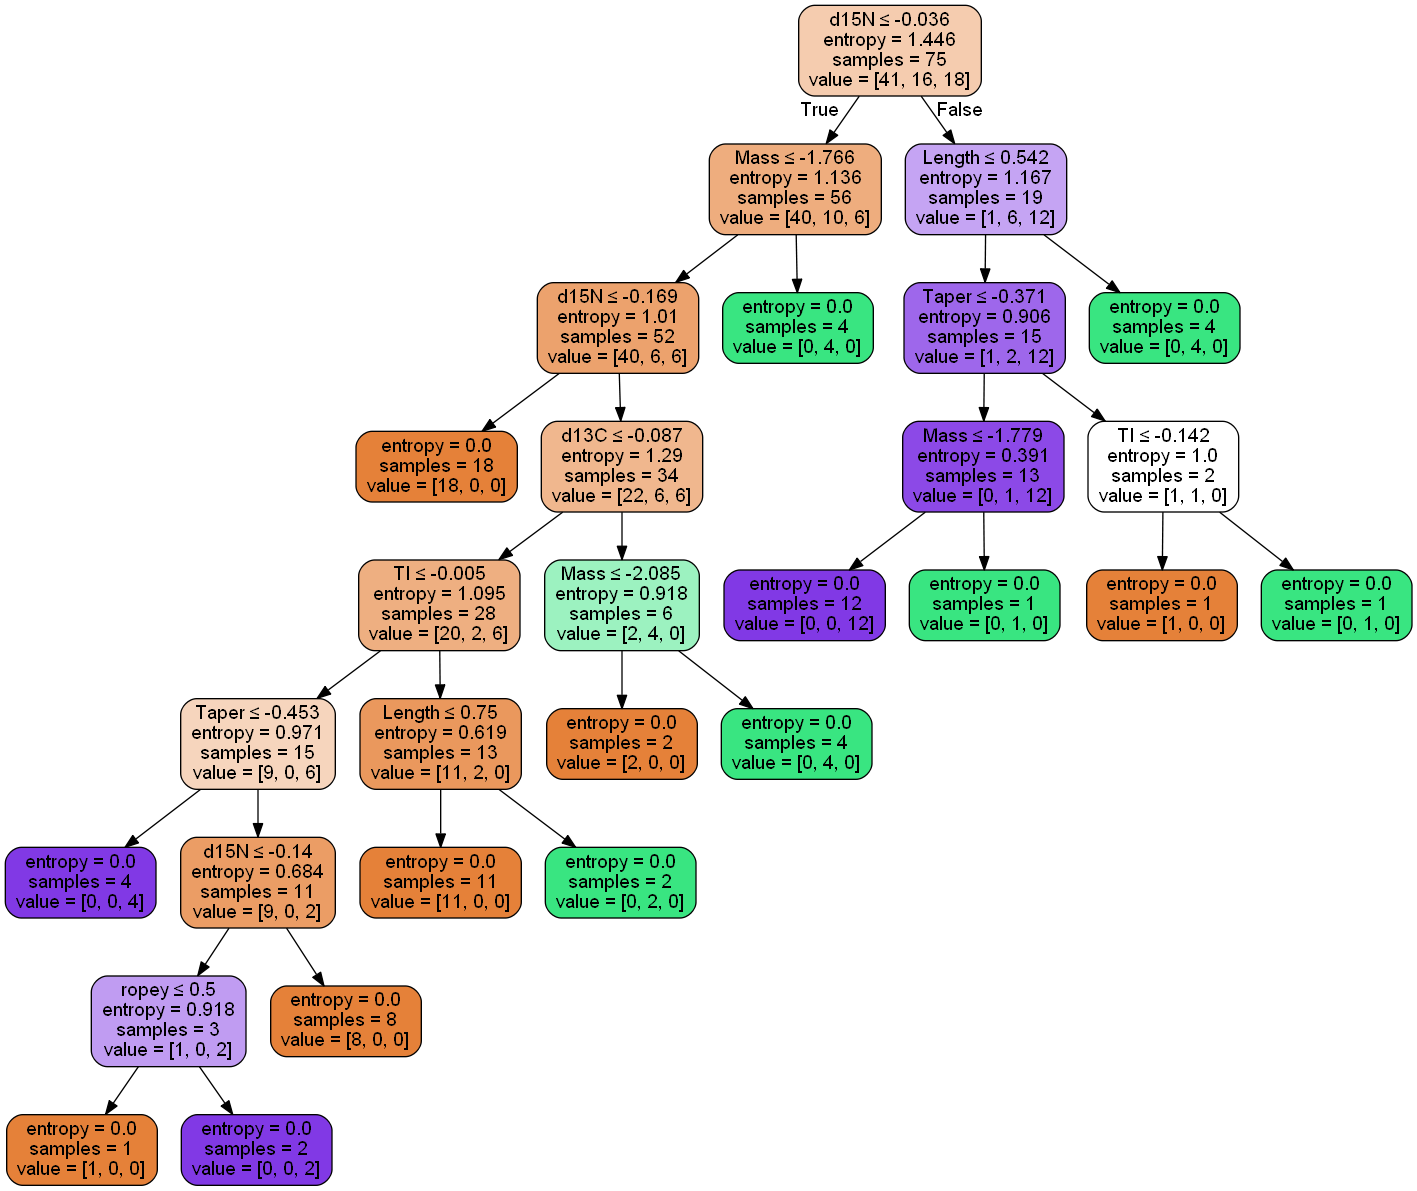

In [98]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=scat.columns[0:11])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

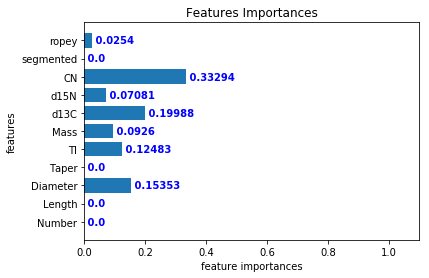

In [99]:
def plot_feature_imp(model, n_feature):
    n_features = n_feature # 특성의 개수
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), list(train_X))
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
    plt.xlim(0, 1.1)
    plt.title("Features Importances")
    
    y=list(model.feature_importances_)
    y = np.round(y, 5)
    y
    
    for i, v in enumerate(y):
        plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')

plot_feature_imp(tree, n_feature=11)

# 랜덤 포레스트

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
forest = RandomForestClassifier(n_estimators=100, criterion='entropy')
forest.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
pred_test=tree.predict(test_X) #now we pass the testing data to the trained algorithm
pred_train=tree.predict(train_X)
print('The accuracy of train is:',metrics.accuracy_score(pred_train,train_y))
print('The accuracy of test is:',metrics.accuracy_score(pred_test,test_y))

The accuracy of train is: 1.0
The accuracy of test is: 0.7878787878787878


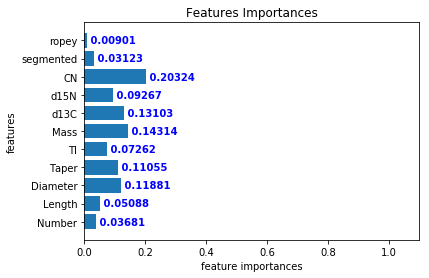

In [106]:
plot_feature_imp(forest, n_feature=11)

# 수치형 변수만 사용한 모델링

In [107]:
features_only = final_feature.iloc[:, 0:9]

In [108]:
train_X, test_X, train_y, test_y = train_test_split(features_only, y, test_size = 0.3, random_state=10) # X, y 위치 중요

In [109]:
naive = GaussianNB()
naive.fit(train_X, train_y)

pred_test=naive.predict(test_X) #now we pass the testing data to the trained algorithm
pred_train=naive.predict(train_X)
print('The accuracy of train is:',metrics.accuracy_score(pred_train,train_y))
print('The accuracy of test is:',metrics.accuracy_score(pred_test,test_y))

The accuracy of train is: 0.8533333333333334
The accuracy of test is: 0.8787878787878788


In [110]:
logi = LogisticRegression(solver='lbfgs', multi_class = 'auto')
logi.fit(train_X,train_y)

pred_test=logi.predict(test_X) #now we pass the testing data to the trained algorithm
pred_train=logi.predict(train_X)
print('The accuracy of train is:',metrics.accuracy_score(pred_train,train_y))
print('The accuracy of test is:',metrics.accuracy_score(pred_test,test_y))

The accuracy of train is: 0.72
The accuracy of test is: 0.8484848484848485


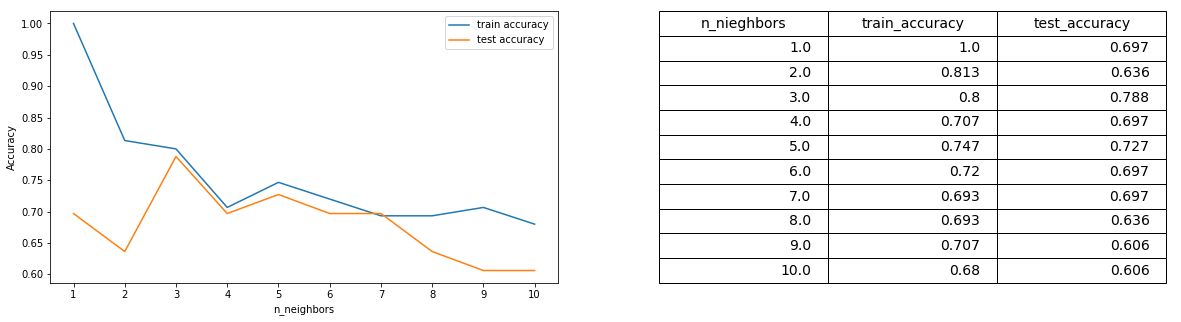

In [111]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(121)
#ax1.scatter(x=df['x'],y=df['y'])

a_index=list(range(1,11))
a=pd.Series()
b=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]



for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction_train=model.predict(train_X)
    prediction_test=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction_train,train_y)))
    b=b.append(pd.Series(metrics.accuracy_score(prediction_test,test_y)))
ax1.plot(a_index, a, label="train accuracy")
ax1.plot(a_index, b, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.xticks(x)

#
df = pd.DataFrame( {"n_nieghbors" : a_index,
                    "train_accuracy" : np.round(a,3),
                    "test_accuracy" : np.round(b,3)}
)

#
ax2 = fig.add_subplot(122)
font_size=14
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = df.values, rowLabels = None, bbox=bbox, colLabels=df.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

In [119]:
forest = RandomForestClassifier(n_estimators=100, criterion='entropy')
forest.fit(train_X,train_y)

pred_test=forest.predict(test_X) #now we pass the testing data to the trained algorithm
pred_train=forest.predict(train_X)
print('The accuracy of train is:',metrics.accuracy_score(pred_train,train_y))
print('The accuracy of test is:',metrics.accuracy_score(pred_test,test_y))

The accuracy of train is: 1.0
The accuracy of test is: 0.7878787878787878


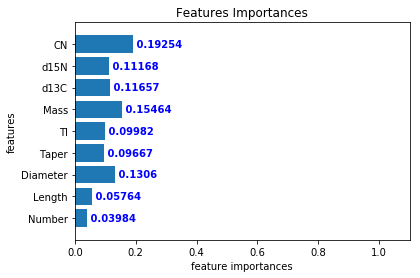

In [120]:
plot_feature_imp(forest, n_feature=9)